In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# 导入数据，探索数据

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
%matplotlib inline
import seaborn as sns #相当于matplotlib

# 相关变量分析

## 查看存活率

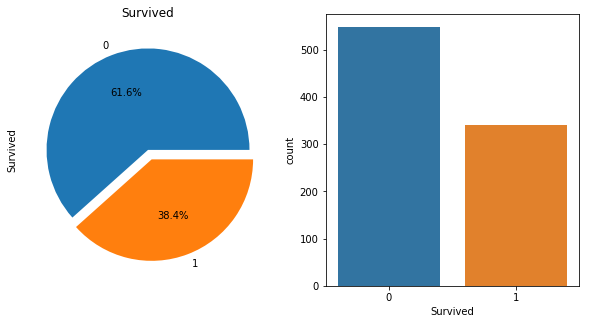

In [8]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
data.Survived.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('Survived',data=data,ax=ax[1])

## 单变量之间的关系

In [9]:
data.Survived.groupby(data.Sex).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

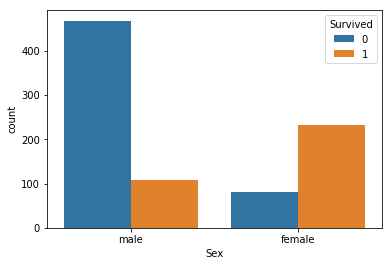

In [10]:
sns.countplot('Sex',hue='Survived',data=data)

In [11]:
#交叉表对计数比较好
pd.crosstab(data.Pclass,data.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


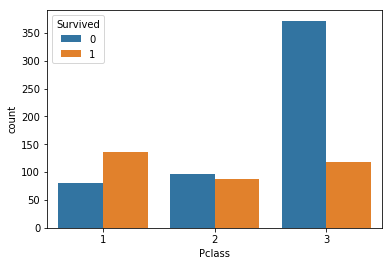

In [12]:
sns.countplot('Pclass',hue='Survived',data=data)

## 多变量之间的分析

In [13]:
pd.crosstab([data.Survived,data.Sex],data.Pclass,margins=True)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

E:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


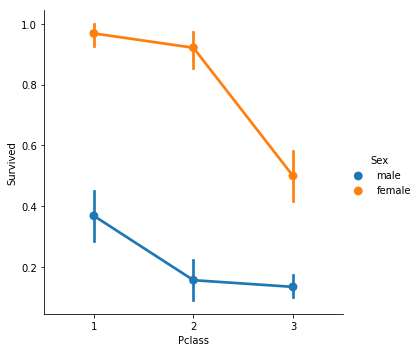

In [14]:
#三个变量的对比
sns.factorplot('Pclass','Survived',hue='Sex',data=data)

## 缺失值的填充

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
import re

In [17]:
data.Name[0]

'Braund, Mr. Owen Harris'

In [18]:
a=re.compile('([a-zA-Z]+)\.')
a.findall(data.Name[0])

['Mr']

In [19]:
data['inital']=data.Name.str.extract('([A-Za-z]+)\.')

In [20]:
data['inital']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: inital, Length: 891, dtype: object

In [21]:
pd.crosstab(data.Sex,data.inital)

inital,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data.inital.values

array(['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr',
       'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr',
       'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss',
       'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr'

In [23]:
re=[]
for i in data.inital.values:
    if i!='Master' and i !='Miss' and i != 'Mr' and i != 'Mrs':
        re.append(i.replace(i,'other'))
    else:
        re.append(i)

In [24]:
np.unique(re)

array(['Master', 'Miss', 'Mr', 'Mrs', 'other'], dtype='<U6')

In [25]:
data['re']=re

In [26]:
data.groupby('re')['Age'].count()

re
Master     36
Miss      146
Mr        398
Mrs       108
other      26
Name: Age, dtype: int64

In [27]:
data.groupby('re')['Age'].mean()

re
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [28]:
#缺失值的填充
for i in data.re:
    data.loc[(data.Age.isnull())&(data.re==i),'Age']=int(data.groupby('re')['Age'].mean()[i])

In [29]:
data.Age.isnull().sum()

0

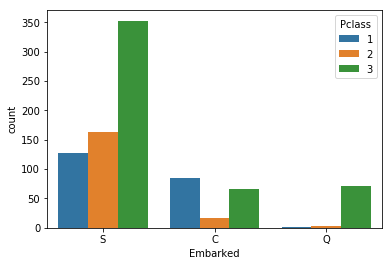

In [30]:
#分析Embarked,不同港口对应的不同船舱等级
sns.countplot('Embarked',hue='Pclass',data=data)

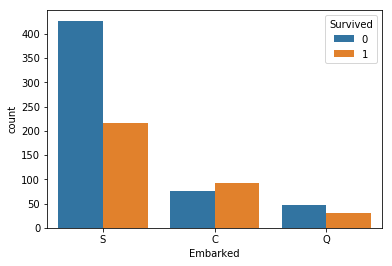

In [31]:
sns.countplot('Embarked',hue='Survived',data=data)

In [32]:
data.Embarked.isnull().sum()

2

In [33]:
data.Embarked.fillna('S',inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
inital         891 non-null object
re             891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB


In [126]:
#data['Cabin']

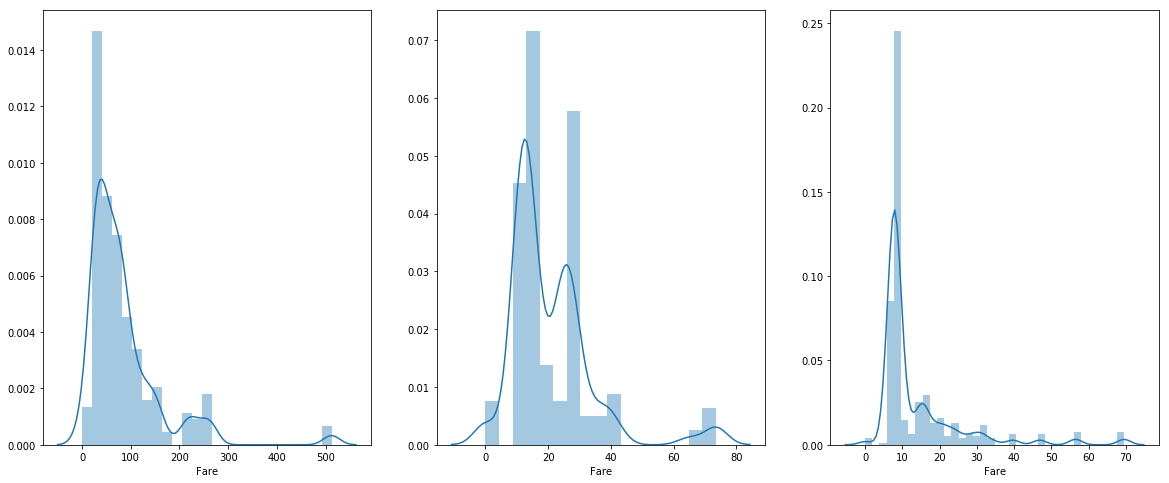

In [36]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data.Pclass==1].Fare,ax=ax[0])
sns.distplot(data[data.Pclass==2].Fare,ax=ax[1])
sns.distplot(data[data.Pclass==3].Fare,ax=ax[2])

## 相关性检验

In [37]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.043358,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.089369,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.346011,0.083081,0.018443,-0.549500
Age,0.043358,-0.089369,-0.346011,1.000000,-0.268632,-0.195330,0.092215
SibSp,-0.057527,-0.035322,0.083081,-0.268632,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.195330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.092215,0.159651,0.216225,1.000000


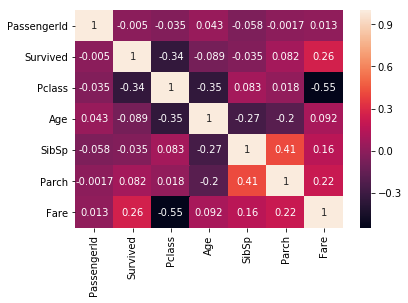

In [38]:
sns.heatmap(data.corr(),annot=True)

# 数据预处理

In [39]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inital,re
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4,D28,S,Miss,Miss


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
inital         891 non-null object
re             891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB


In [41]:
#手动分箱
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=60),'Age_band']=3
data.loc[data['Age']>60,'Age_band']=4

In [42]:
from sklearn.preprocessing import LabelEncoder #标准化标签

In [43]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inital,re,Age_band
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.25,NaN,S,Mrs,Mrs,1


In [44]:
llb=LabelEncoder()
data.Sex=llb.fit_transform(data.Sex)
data.Embarked=llb.fit_transform(data.Embarked)
data.re=llb.fit_transform(data.re)

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inital,re,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs,3,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Mrs,3,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Mr,2,2


In [46]:
np.unique(data.Embarked)

array([0, 1, 2])

In [47]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,inital,re,Age_band
377,378,0,1,"Widener, Mr. Harry Elkins",1,27.0,0,2,113503,211.5,C82,0,Mr,2,1


In [48]:
data.drop(['PassengerId','Name','Age','Ticket','Cabin','inital'],axis=1,inplace=True)

In [49]:
data.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,re,Age_band
0,0,3,1,1,0,7.2500,2,2,1
1,1,1,0,1,0,71.2833,0,3,2


In [50]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X=data.iloc[:,data.columns!='Survived']
y=data.iloc[:,data.columns=='Survived']

In [54]:
X.shape

(891, 8)

In [55]:
np.unique(y)

array([0, 1], dtype=int64)

In [114]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=10)

In [115]:
Xtrain.shape

(712, 8)

In [116]:
Xtest.shape

(179, 8)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
#逻辑回归
l = LogisticRegression()
l.fit(Xtrain,Ytrain)
l.score(Xtest,Ytest)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8156424581005587

In [119]:
#设置可取参数
param_grid={'criterion':['entropy','gini'],
            'max_depth':range(2,10),
            'min_samples_leaf':range(1,10),
            'min_samples_split':range(2,10)}
#设置网格
GR=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
 #建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(2, 10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [120]:
GR.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [85]:
GR.best_score_

0.8314606741573034

In [121]:
#评估测试集的表现
dct=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5,min_samples_split=3)
dct.fit(Xtrain,Ytrain)
dct.score(Xtest,Ytest)

0.8435754189944135

In [122]:
dct.feature_importances_

array([1.69364306e-01, 3.88819223e-01, 8.14612202e-02, 2.20913083e-04,
       2.46566251e-01, 2.86764983e-02, 5.28169001e-02, 3.20746883e-02])

In [123]:
#外部集成接口
from sklearn.ensemble import BaggingClassifier #装袋

In [125]:
#实例化
model = BaggingClassifier(base_estimator=dct,
                          n_estimators=700,
                         random_state=0)#base_estimator=None,对哪个模型做集成，传入哪个模型。 n_estimators=10,是迭代次数
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)

E:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8715083798882681

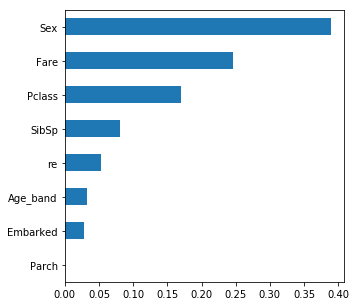

In [128]:
f=plt.figure(figsize=(5,5))
clf=DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=5,min_samples_split=3)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)
pd.Series(clf.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

# ROC曲线

In [129]:
y_pred=clf.predict(Xtest)

In [131]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [132]:
from sklearn.metrics import roc_curve,auc#计算roc_curve roc曲线和 auc auccsry准确率

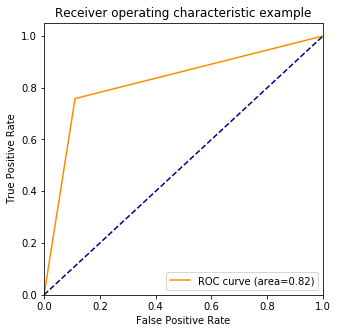

In [134]:
#计算真正率和假证率
fpr,tpr,threshold=roc_curve(Ytest,y_pred)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')

In [170]:
Ytest

,Survived
590,0
131,0
628,0
195,1
230,1
646,0
75,0
586,0
569,1
287,0


In [169]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [166]:
#print(y_pred)
print(tpr)
print(fpr)
print(theshold)

[0.         0.75806452 1.        ]
[0.         0.11111111 1.        ]
[2 1 0]


In [164]:
sum(y_pred)

62

0.3463687150837989

In [158]:
set(Ytest.Survived)

{0, 1}

In [142]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [145]:
import warnings
warnings.filterwarnings('ignore')

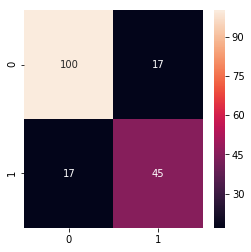

In [148]:
plt.figure(figsize=(4,4))
# KNN = KNeighborsClassifier(n_neighbors=3)
# KNN.fit(Xtrain,Ytrain)
y_pred =cross_val_predict(clf,Xtest,Ytest,cv=10)
sns.heatmap(metrics.confusion_matrix(Ytest,y_pred),annot=True,fmt='2.0f')

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
lr=LinearRegression()
lr.fit(Xtrain,Ytrain)
lr.score(Xtest,Ytest)

0.4268395098804623